# Representación Gráfica de resultados obtenidos en la comparacion de función secuencial con función paralelizada

## SIMD ocupando arreglo multiple de 4 y valor tipo float

   iteracion  tiempo_secuencial  tiempo_simd factor_aceleracion  Aceleracion
0          1              0.670        0.191              3.51x         3.51
1          2              0.445        0.224              1.99x         1.99
2          3              0.437        0.179              2.44x         2.44
3          4              0.443        0.191              2.32x         2.32
4          5              0.427        0.175              2.44x         2.44

Promedios:
iteracion            25.50000
tiempo_secuencial     0.43610
tiempo_simd           0.18184
Aceleracion           2.40380
dtype: float64


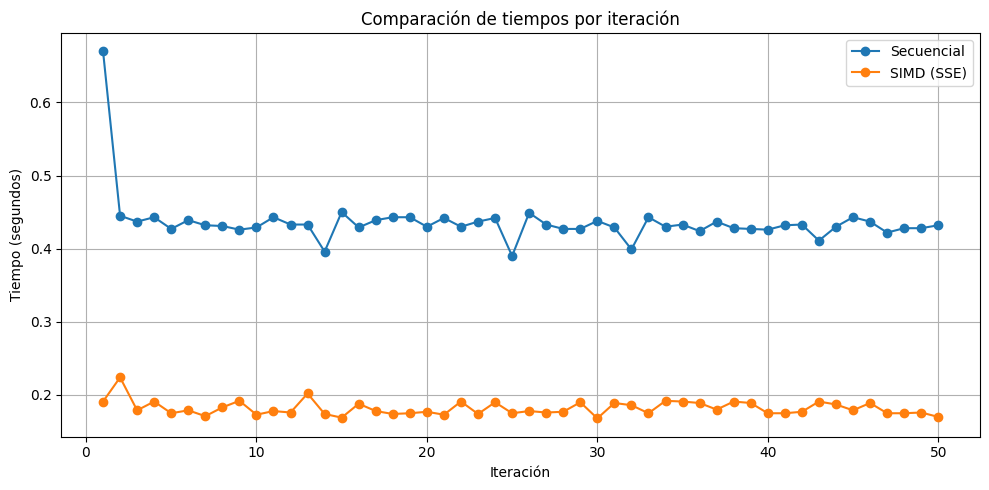

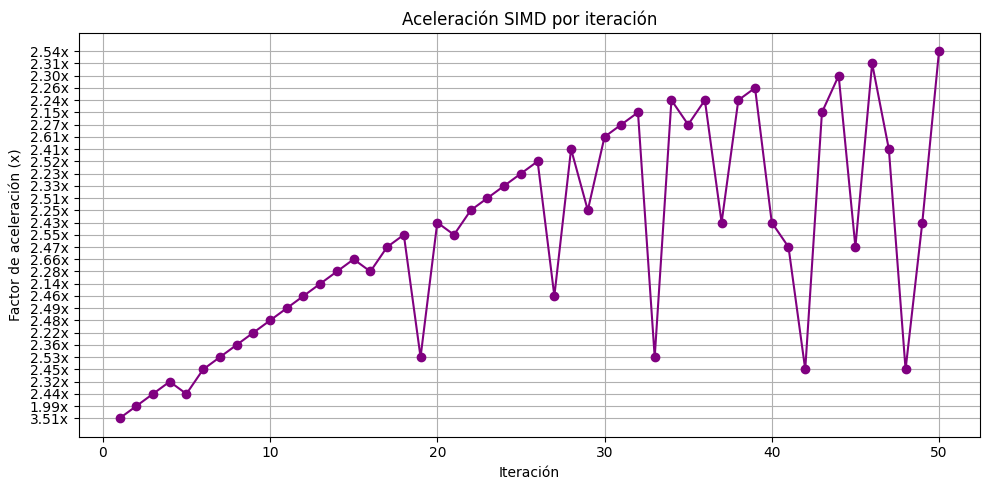

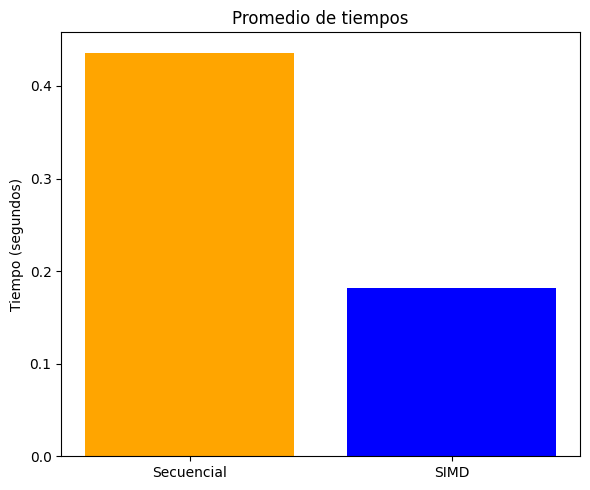

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("resultados.csv")


df["Aceleracion"] = df["factor_aceleracion"].str.replace("x", "").astype(float)


print(df.head())
print("\nPromedios:")
print(df.mean(numeric_only=True))

plt.figure(figsize=(10, 5))
plt.plot(df["iteracion"], df["tiempo_secuencial"], label="Secuencial", marker='o')
plt.plot(df["iteracion"], df["tiempo_simd"], label="SIMD (SSE)", marker='o')
plt.title("Comparación de tiempos por iteración")
plt.xlabel("Iteración")
plt.ylabel("Tiempo (segundos)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(df["iteracion"], df["factor_aceleracion"], color='purple', marker='o')
plt.title("Aceleración SIMD por iteración")
plt.xlabel("Iteración")
plt.ylabel("Factor de aceleración (x)")
plt.grid(True)
plt.tight_layout()
plt.show()


promedios = df.mean(numeric_only=True)
plt.figure(figsize=(6, 5))
plt.bar(["Secuencial", "SIMD"], [promedios["tiempo_secuencial"], promedios["tiempo_simd"]], color=["orange", "blue"])
plt.title("Promedio de tiempos")
plt.ylabel("Tiempo (segundos)")
plt.tight_layout()
plt.show()


## SIMD con arreglos no multiplos de 4 

   iteracion  tiempo_secuencial  tiempo_simd  factor_aceleracion
0          1              0.760        0.229                3.32
1          2              0.459        0.190                2.42
2          3              0.476        0.223                2.13
3          4              0.427        0.270                1.58
4          5              0.449        0.186                2.41

Promedios:
iteracion             25.50000
tiempo_secuencial      0.43916
tiempo_simd            0.18808
factor_aceleracion     2.34060
dtype: float64


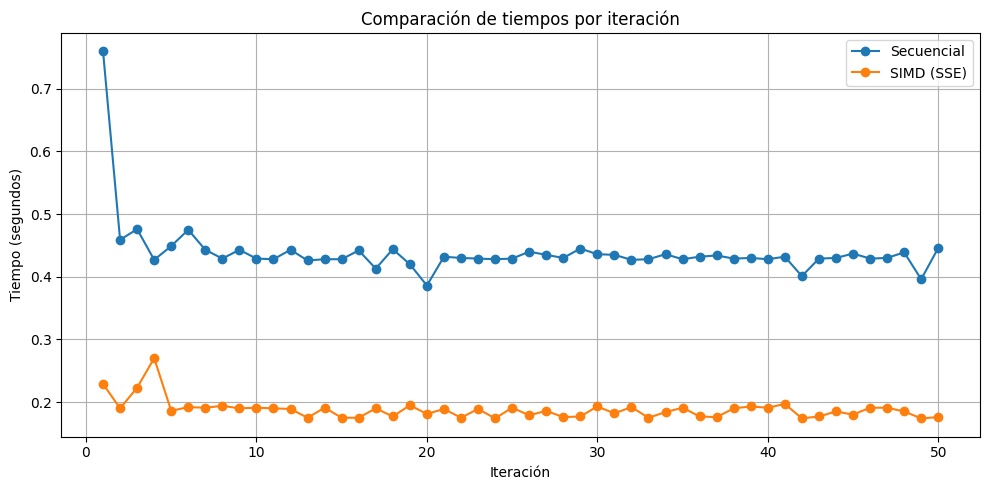

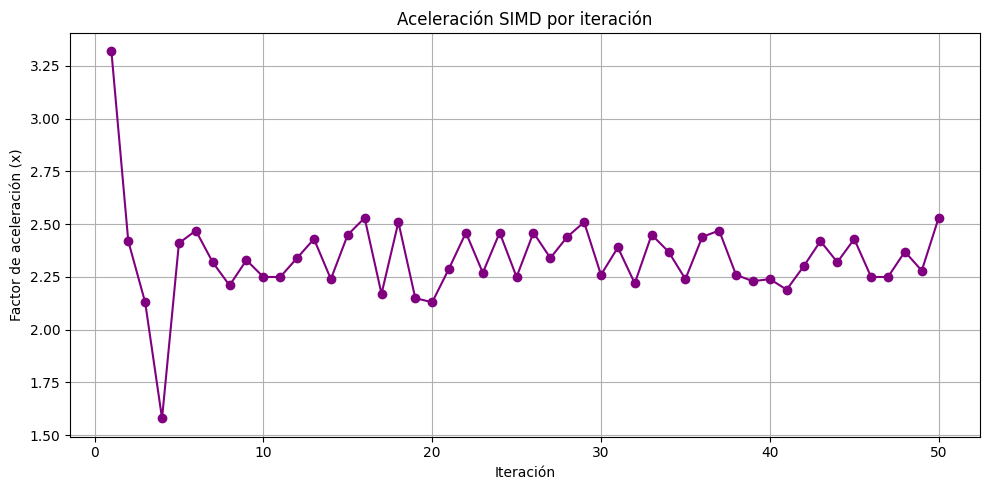

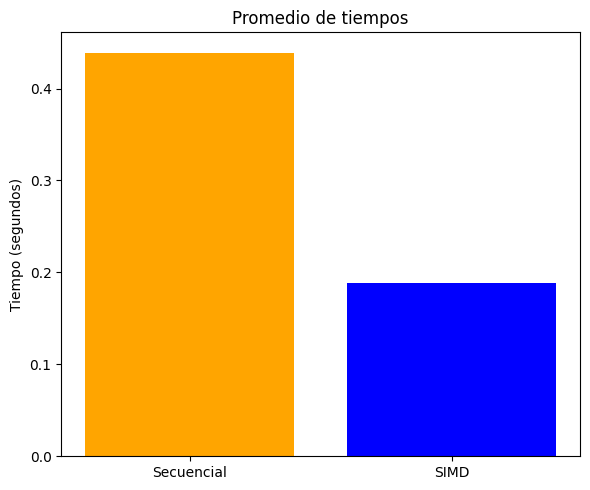

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("resultadosNoMulitple4.csv")


df["factor_aceleracion"] = df["factor_aceleracion"].str.replace("x", "").astype(float)


print(df.head())
print("\nPromedios:")
print(df.mean(numeric_only=True))

plt.figure(figsize=(10, 5))
plt.plot(df["iteracion"], df["tiempo_secuencial"], label="Secuencial", marker='o')
plt.plot(df["iteracion"], df["tiempo_simd"], label="SIMD (SSE)", marker='o')
plt.title("Comparación de tiempos por iteración")
plt.xlabel("Iteración")
plt.ylabel("Tiempo (segundos)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(df["iteracion"], df["factor_aceleracion"], color='purple', marker='o')
plt.title("Aceleración SIMD por iteración")
plt.xlabel("Iteración")
plt.ylabel("Factor de aceleración (x)")
plt.grid(True)
plt.tight_layout()
plt.show()


promedios = df.mean(numeric_only=True)
plt.figure(figsize=(6, 5))
plt.bar(["Secuencial", "SIMD"], [promedios["tiempo_secuencial"], promedios["tiempo_simd"]], color=["orange", "blue"])
plt.title("Promedio de tiempos")
plt.ylabel("Tiempo (segundos)")
plt.tight_layout()
plt.show()


## Comparación

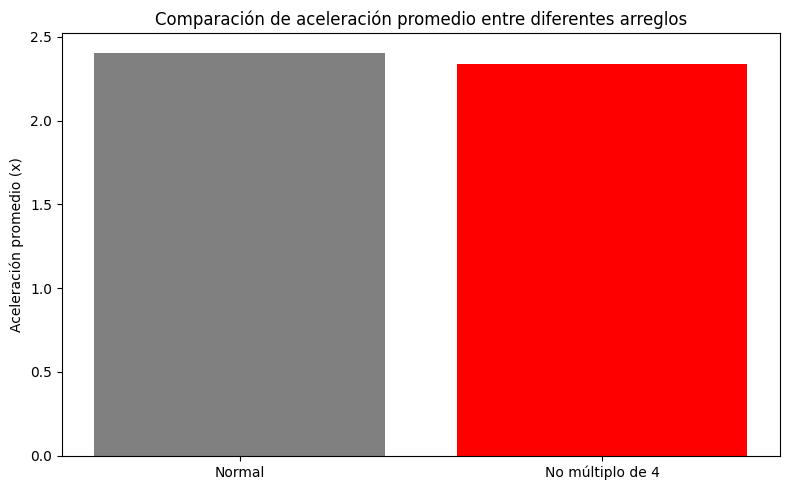

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer todos los resultados
df_normal = pd.read_csv("resultados.csv")
df_n4 = pd.read_csv("resultadosNoMulitple4.csv")


# Limpiar 'x' en todas las aceleraciones
for df in [df_normal, df_n4]:
    df["factor_aceleracion"] = df["factor_aceleracion"].str.replace("x", "").astype(float)

# Calcular promedios
promedios = {
    "Normal": df_normal["factor_aceleracion"].mean(),
    "No múltiplo de 4": df_n4["factor_aceleracion"].mean(),
}

# Graficar comparación de aceleraciones promedio
plt.figure(figsize=(8, 5))
plt.bar(promedios.keys(), promedios.values(), color=['gray','red','blue','green'])
plt.title("Comparación de aceleración promedio entre diferentes arreglos")
plt.ylabel("Aceleración promedio (x)")
plt.tight_layout()
plt.show()
